In [1]:
import numpy as np
import camb
from matplotlib import pyplot as plt
from scipy import interpolate

%matplotlib inline

In [14]:
#set up a new set of parameters for CAMB
pars = camb.read_ini("Quijote.ini")
pars.WantTransfer = True

print(pars.ombh2,pars.omch2)

redshift = np.array([0,3,10,30,50,100][::-1]).astype(int)
# redshift = [100]
pars.set_matter_power(redshifts=redshift,kmax=300)

pars.Accuracy.AccuracyBoost = 2.

# print(pars)

results = camb.get_results(pars)

0.02206838529 0.12088070636


In [3]:
#set up the primordial power spectrum
h = pars.h
As = pars.InitPower.As
A = 2*np.pi*np.pi*As
ns = pars.InitPower.ns
kpivot = pars.InitPower.pivot_scalar
pfactor = A*kpivot**(1.-ns)

def P(k):
    return np.power(k,ns-4.)*pfactor

In [4]:
As,np.log(1e10*pars.InitPower.As), pars.InitPower.ns

(2.1355e-09, 3.0612859042934297, 0.9624)

In [5]:
pars.omegam, pars.omegab, pars.omegac, pars.h

(0.3173999999911185, 0.048999999999999995, 0.2683999999911185, 0.6711)

In [6]:
results.get_matter_transfer_data().transfer_data.shape

(13, 703, 6)

In [7]:
results.get_sigma8()

array([0.01066733, 0.02092238, 0.03428719, 0.09622594, 0.26274831,
       0.83408849])

In [8]:
results.get_sigmaR(8, z_indices=None, var1=3, var2=3, hubble_units=True, return_R_z=False)

array([0.00795275, 0.01798984, 0.03123617, 0.09300381, 0.25940032,
       0.83060439])

In [9]:
f_growth = results.get_fsigma8() / results.get_sigma8()
np.savetxt("fgrowth.dat",f_growth)
f_growth

array([0.98669571, 0.99238683, 0.99503133, 0.99721502, 0.98144231,
       0.52934966])

In [15]:
results.comoving_radial_distance(0)

0.0

In [16]:
results.comoving_radial_distance(redshift)

array([12831.92436257, 12195.91587259, 11571.91378474,  9644.41024176,
        6517.92596886,     0.        ])

In [17]:
np.savetxt("comovingD-0-6-0.5.dat",results.comoving_radial_distance(redshift)[::-1])

In [ ]:
results.hubble_parameter(redshift)

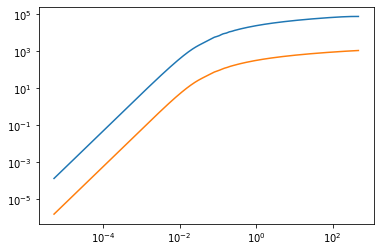

In [31]:
koverh = results.get_matter_transfer_data().transfer_data[0,:,:]
k = koverh * h
bary = results.get_matter_transfer_data().transfer_data[1,:,::-1]*k*k * h**1.5
koverh = koverh[:,0]
k = k[:,0]

plt.loglog(koverh,bary[:,[0,-1]])
plt.show()

In [38]:
koverhlin, zz, pplin = results.get_linear_matter_power_spectrum(var1="delta_cdm",var2="delta_cdm",k_hunit=True,hubble_units=True,nonlinear=False)

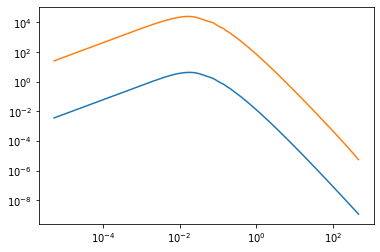

In [39]:
plt.loglog(koverhlin,pplin[-1])
# plt.gca().set_prop_cycle(None)
# plt.loglog(koverh,(P(k) * bary[:,-1]**2))

plt.loglog(koverhlin,pplin[0])
# plt.gca().set_prop_cycle(None)
# plt.loglog(koverh,(P(k) * bary[:,0]**2))
plt.show()

In [34]:
TransDat = np.concatenate((koverh[:,np.newaxis],bary),axis=1)

In [35]:
np.savetxt("LinearTransfer.dat",TransDat)

In [40]:
LinDat = np.concatenate((koverhlin[:,np.newaxis],pplin.T),axis=1)

In [41]:
np.savetxt("PLinear.dat",LinDat)

In [45]:
np.loadtxt("PNonLinearQuijote.dat")

array([[8.89964122e-03, 2.08223498e+04, 1.22982081e+04, 7.65418258e+03,
        2.06762391e+03],
       [1.50791222e-02, 2.46870446e+04, 1.45969370e+04, 9.09058139e+03,
        2.45755071e+03],
       [2.14479019e-02, 2.39629275e+04, 1.41891329e+04, 8.84381534e+03,
        2.39322645e+03],
       ...,
       [5.55749331e+00, 2.64912415e+02, 1.43484813e+02, 1.01245008e+02,
        1.01768941e+02],
       [5.56228171e+00, 2.67699153e+02, 1.45637057e+02, 1.02474963e+02,
        1.02699788e+02],
       [5.56927272e+00, 2.71755519e+02, 1.46572823e+02, 1.03862938e+02,
        1.03678539e+02]])